<a href="https://colab.research.google.com/github/egagiilang/BIGDATA/blob/master/pemrosesan_data_dan_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Instalasi Spark pada Google Colab**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

# **2. Import library Spark yang sudah diinstal**

In [ ]:
!pip install -q pyspark_dist_explore

In [ ]:
import findspark
findspark.init("spark-3.0.0-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg
from matplotlib import pyplot as plt
from pyspark_dist_explore import Histogram, hist

# **3. Inisialisasi SparkContext dan SparkSession**

In [ ]:
sc = spark.sparkContext
spark = SparkSession(sc)

# **4. Load Dataset**

In [ ]:
WorldCupMatches_df = spark.read.csv("WorldCupMatches_Processed.csv", header=True, inferSchema=True)
WorldCupMatches_df.printSchema() 

root
 |-- Year: integer (nullable = true)
 |-- Datetime: string (nullable = true)
 |-- Stage: string (nullable = true)
 |-- Stadium: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Home Team Name: string (nullable = true)
 |-- Home Team Goals: integer (nullable = true)
 |-- Away Team Goals: integer (nullable = true)
 |-- Away Team Name: string (nullable = true)
 |-- Win conditions: string (nullable = true)
 |-- Attendance: integer (nullable = true)
 |-- Half_timeHomeGoals: integer (nullable = true)
 |-- Half_timeAwayGoals: integer (nullable = true)
 |-- Referee: string (nullable = true)
 |-- Assistant 1: string (nullable = true)
 |-- Assistant 2: string (nullable = true)
 |-- RoundID: integer (nullable = true)
 |-- MatchID: integer (nullable = true)
 |-- Home Team Initials: string (nullable = true)
 |-- Away Team Initials: string (nullable = true)



In [ ]:
WorldCupMatches_df.show(5)

+----+-------------------+-------+--------------+----------+--------------+---------------+---------------+--------------+--------------+----------+------------------+------------------+--------------------+--------------------+--------------------+-------+-------+------------------+------------------+
|Year|           Datetime|  Stage|       Stadium|      City|Home Team Name|Home Team Goals|Away Team Goals|Away Team Name|Win conditions|Attendance|Half_timeHomeGoals|Half_timeAwayGoals|             Referee|         Assistant 1|         Assistant 2|RoundID|MatchID|Home Team Initials|Away Team Initials|
+----+-------------------+-------+--------------+----------+--------------+---------------+---------------+--------------+--------------+----------+------------------+------------------+--------------------+--------------------+--------------------+-------+-------+------------------+------------------+
|1930|13 Jul 1930 - 15:00|Group 1|       Pocitos|Montevideo|        France|             

In [ ]:
data = WorldCupMatches_df.select('Year','Half_timeHomeGoals','Half_timeAwayGoals')

In [ ]:
data.show(10)

+----+------------------+------------------+
|Year|Half_timeHomeGoals|Half_timeAwayGoals|
+----+------------------+------------------+
|1930|                 3|                 0|
|1930|                 2|                 0|
|1930|                 2|                 0|
|1930|                 1|                 0|
|1930|                 0|                 0|
|1930|                 1|                 0|
|1930|                 0|                 0|
|1930|                 2|                 0|
|1930|                 0|                 0|
|1930|                 0|                 0|
+----+------------------+------------------+
only showing top 10 rows



# **5. Pemrosesan Data**

Di pemrosesan data ini, analisis yang digunakan adalah menghitung perbandingan jumlah goal yang terjadi pada half-time

Karena banyak kemungkinan yang terjadi maka diambil salah satu contoh untuk di proses

**Jumlah goal pada half-time (1-1)**

Pada proses ini menggunakan transformation dan action pada spark dataframe

In [ ]:
# data home
data_home = data.filter(data.Half_timeHomeGoals == '1')
home = data_home.filter(data_home.Half_timeHomeGoals > 0)
home.show()

# data away
data_away = data.filter(data.Half_timeAwayGoals == '1')
away = data_away.filter(data_away.Half_timeAwayGoals > 0)
away.show()

# membuat tabel 
home.createOrReplaceTempView("HM")
away.createOrReplaceTempView("AW")

jumlah = spark.sql("SELECT COUNT(Half_timeHomeGoals) FROM HM").show()
jumlah2 = spark.sql("SELECT COUNT(Half_timeAwayGoals) FROM AW").show()

+----+------------------+------------------+
|Year|Half_timeHomeGoals|Half_timeAwayGoals|
+----+------------------+------------------+
|1930|                 1|                 0|
|1930|                 1|                 0|
|1930|                 1|                 0|
|1930|                 1|                 0|
|1930|                 1|                 0|
|1930|                 1|                 2|
|1934|                 1|                 1|
|1934|                 1|                 2|
|1934|                 1|                 1|
|1934|                 1|                 0|
|1934|                 1|                 0|
|1934|                 1|                 0|
|1934|                 1|                 0|
|1938|                 1|                 2|
|1938|                 1|                 0|
|1938|                 1|                 1|
|1938|                 1|                 2|
|1950|                 1|                 0|
|1950|                 1|                 0|
|1950|    

Pada data di atas telah dilakukan  pemrosesan data berupa jumlah goal yang terjadi berdasarkan skor yang diraih yaitu 1 baik home ataupun away. Hasil tersebut memperoleh **jumlah goal (home) di half-time = 269** dan **jumlah goal (away) di half-time = 238**

# **6. Visual Data**

Jumlah Goal di half-time berdasarkan home dan away

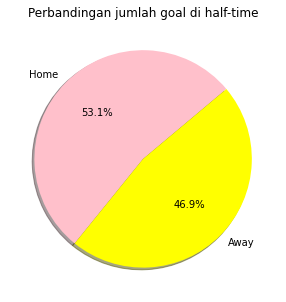

In [ ]:
# plotting data
fig, axes = plt.subplots()

# jumlah goal di half-time
fig.set_size_inches(7, 5)

plt.title('Perbandingan jumlah goal di half-time')
plt.pie([data_home.count(), data_away.count()], labels=['Home', 'Away'], autopct='%1.1f%%', shadow=True, startangle=40, colors=['pink', 'yellow'])
print('\n')

Di dapat kesimpulan bahwa jumlah goal yang dihasilkan dari home dan away (half-time) sepanjang FIFA WORLD CUP diadakan, team dari home lebih banyak meraih skor terlebih dahulu daripada team dari away